In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras.optimizers import SGD


Using TensorFlow backend.


In [0]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
x=Dense(512,activation='elu')(x) #dense layer 3
x=Dense(512,activation='relu')(x) #dense layer 3
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 1s 0us/step


In [0]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [0]:
for layer in model.layers[:10]:
    layer.trainable=False
for layer in model.layers[10:]:
    layer.trainable=True

In [0]:
batch_size = 128
num_classes = 10
epochs = 30
data_augmentation = True
num_predictions = 20

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 14s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1 )

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(x_train, y_train, batch_size=128)
validation_generator = validation_datagen.flow(x_train, y_train, batch_size=128)

In [0]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


In [0]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [0]:


step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
390/390 [==============================] - 43s 111ms/step - loss: 1.1605 - acc: 0.5958 - val_loss: 1.5553 - val_acc: 0.5443
Epoch 2/30
390/390 [==============================] - 35s 91ms/step - loss: 0.7680 - acc: 0.7394 - val_loss: 1.2263 - val_acc: 0.5970
Epoch 3/30
390/390 [==============================] - 35s 89ms/step - loss: 0.6537 - acc: 0.7777 - val_loss: 1.1462 - val_acc: 0.6226
Epoch 4/30
390/390 [==============================] - 34s 88ms/step - loss: 0.5818 - acc: 0.8023 - val_loss: 1.0091 - val_acc: 0.6772
Epoch 5/30
390/390 [==============================] - 36s 92ms/step - loss: 0.5342 - acc: 0.8190 - val_loss: 1.1912 - val_acc: 0.6352
Epoch 6/30
390/390 [==============================] - 35s 90ms/step - loss: 0.4877 - acc: 0.8323 - val_loss: 1.1734 - val_acc: 0.6383
Epoch 7/30
390/390 [==============================] - 34s 88ms/step - loss: 0.4561 - acc: 0.8446 - val_loss: 1.2873 - val_acc: 0.6104
Epoch 8/30
390/390 [==============================] - 36s 92m

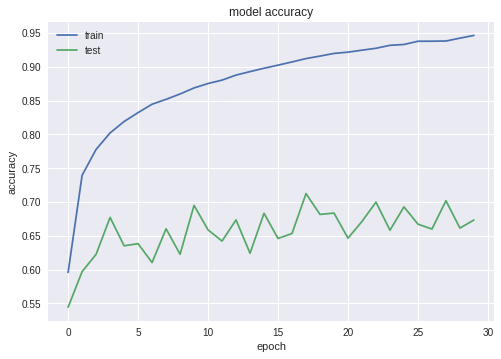

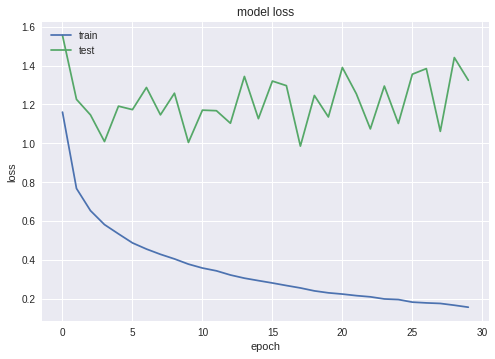

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

Test loss: 1.3246878915786744
Test accuracy: 0.6734
